<a href="https://colab.research.google.com/github/buixuanthanh96/CS114.K21/blob/master/%C4%91%E1%BB%93_%C3%A1n_cu%E1%BB%91i_k%E1%BB%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài toán phát hiện đeo khẩu trang
1. Mô tả bài toán:
input= hình ảnh có khuôn mặt
output= khuôn mặt có đeo khẩu trang hay không

2. Mô tả về bộ dữ liệu: 
+ cách thức xây dựng bộ dữ liệu dữ liệu được tải từ trên mạng và từ kaggle
+ số lượng: 1277 ảnh người đeo khẩu trang và 1459 ảnh người không đeo khẩu trang
+ các thao tác tiền xử lý dữ liệu: tách khuôn mặt trong ảnh và chia thành 2 tập data là mask và without_mask, sau đó dán nhãn cho data
+ phân chia (split) - train/test: 70/30

3. Mô tả về đặc trưng
+ trích xuất ảnh thành vecter đặc trưng(dùng Histogram of Oriented Gradients)

4. Mô tả về thuật toán máy học
 sử dụng một số thuật toán máy học: Linear SVM, K – Nearest Neighbors, naive_bayes, Random Forest
5. Cài đặt, tinh chỉnh tham số

6. Đánh giá kết quả, kết luận![alt text](https://)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os

path = "/content/drive/My Drive/"
os.chdir(path)

In [2]:
! pip install face-detection

In [40]:
#tách khuôn mạt trong ảnh ra
import cv2
from google.colab.patches import cv2_imshow
import face_detection
import os
import glob2
import os
from sklearn.metrics import classification_report
from requests import get  # to make GET request
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:


path_to_image="/content/drive/My Drive/mask_data/data/"
path_to_image2="/content/drive/My Drive/mask_data/traindata/"
detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3) # khởi tạo "model"
for label in os.listdir(path_to_image) :
  for img_file in os.listdir(os.path.join(path_to_image, label)):
    if not (label.startswith('.') or img_file.startswith('.') or label.startswith('mask')):
      img = glob2.glob(os.path.join(path_to_image+label+"/", img_file))
      image = cv2.imread(img[0],cv2.IMREAD_COLOR)
      detections = detector.detect(image) # nhận diện gương mặt trong ảnh
      i=0
      for face in range(len(detections)):
        pts1 = (detections[face][0],detections[face][1])
        pts2 = (detections[face][2],detections[face][3])
        img_crop = image[(int)(detections[face][1]):(int)(detections[face][3]), (int)(detections[face][0]):(int)(detections[face][2]), :]
        os.chdir(path_to_image2+label)
        if(i==0 and detections[face][0]>=0 and detections[face][2]>=0 ):
          cv2.imwrite(img_file, img_crop)
        # else:
        #   path=str(i)+"_"+img_file
        #   cv2.imwrite(path, img_crop)
        i=i+1



Ảnh gốc:


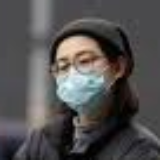



Ảnh sau khi xử lý detect:


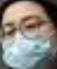

In [37]:
print("Ảnh gốc:")
img= cv2.imread("/content/drive/My Drive/mask_data/data/mask/1.png",cv2.IMREAD_COLOR)
cv2_imshow(img)

print("\n\nẢnh sau khi xử lý detect:")
img1= cv2.imread("/content/drive/My Drive/mask_data/traindata/mask/1.png",cv2.IMREAD_COLOR)
cv2_imshow(img1)

with mask:  1277
without mask:  1459


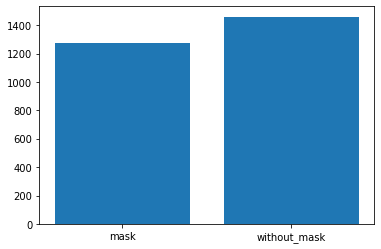

In [18]:
print("with mask: ",len(os.listdir("/content/drive/My Drive/mask_data/traindata/mask")))
print("without mask: ",len(os.listdir("/content/drive/My Drive/mask_data/traindata/without_mask")))

import matplotlib.pyplot as plt

plt.bar(['mask','without_mask'],[len(os.listdir("/content/drive/My Drive/mask_data/traindata/mask")),len(os.listdir("/content/drive/My Drive/mask_data/traindata/without_mask"))])
plt.title("")
plt.show()


In [43]:
#xây dựng inputdata và dán nhãn dữ liêu


path_to_image="/content/drive/My Drive/mask_data/traindata/"
X = [] #chứa image
Y = [] #chứa label
for label in os.listdir(path_to_image) :
  for img_file in os.listdir(os.path.join(path_to_image, label)):
    if not (label.startswith('.') or img_file.startswith('.')):
      img = glob2.glob(os.path.join(path_to_image+label+"/", img_file))
      X.append(img)
      Y.append(label)
# Create train.txt
# with open("train.txt", "w") as f:
#   for idx in np.arange(len(all_files)):
#     # if idx not in rand_idx:
#     f.write(all_files[idx]+'\n')

print(X[0], Y[0])


['/content/drive/My Drive/mask_data/traindata/mask/431.png'] mask


In [45]:
#trích xuất đạc trưng hog
import cv2

image_descriptors = []
def extract_hog_features(X):
  hog = cv2.HOGDescriptor()
  for i in range(len(X)):
    image = cv2.imread(X[i][0], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(src=image, dsize=(96, 128))
    feature_hog = hog.compute(img).flatten()
    image_descriptors.append(feature_hog)
  return image_descriptors

X_features=extract_hog_features(X)
print(X_features[0].shape)
print(X_features[0])


(18900,)
[0.18343844 0.18944857 0.09124218 ... 0.18271807 0.17573671 0.20389396]


In [46]:

X_train, X_test, Y_train, Y_test= train_test_split(X_features,Y,test_size=0.3)
print("TRAIN: "+str(len(X_train))+ " TEST: "+str(len(X_test)))

TRAIN: 1915 TEST: 821


In [49]:
!pip install metrics

     |████████████████████████████████| 849kB 3.9MB/s 
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17815 sha256=2dee6263363d8d7074513d3c2572e75b7212c1f025571200679cbf05eecda5d5
  Stored in directory: /root/.cache/pip/wheels/38/e8/55/c4c648451a33a60920318eba4c5735088dbf78dc20d4277db0
  Created wheel for pathspec: filename=pathspec-0.5.5-cp36-none-any.whl size=24229 sha256=5a9f17be4840df1a26dc4ac6576fb6245feed5c924a1a0c8c8fb8808300ca979
  Stored in directory: /root/.cache/pip/wheels/d1/2e/6b/c67842adf3b13ea33ca3fe6a2a963622821ad647db724688e2
Successfully built metrics pathspec
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


In [53]:
#train và test với svm
#
from sklearn.metrics import classification_report

clf_svm = LinearSVC()
clf_svm.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_svm.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

print(classification_report(Y_test,predict,["mask","without_mask"]))
accuracy =  (true/(true+false))*100
print("*SVM*")
print("Đoán đúng: ",true)
print("Đoán sai: ",false)
print("Accuracy: ",accuracy, "%")


*** TRAINING END ***
              precision    recall  f1-score   support

        mask       0.95      0.96      0.96       364
without_mask       0.97      0.96      0.96       457

    accuracy                           0.96       821
   macro avg       0.96      0.96      0.96       821
weighted avg       0.96      0.96      0.96       821

*SVM*
Đoán đúng:  789
Đoán sai:  32
Accuracy:  96.10231425091352 %


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
#save model

os.chdir("/content/drive/My Drive/mask_data/")
dump(clf_svm, 'clf_svm.joblib') 

['clf_svm.joblib']

In [ ]:
clf_svm = load('clf_svm.joblib') 

In [ ]:
#train và test với K – Nearest Neighbors – KNN
# import time
# start_time = time.time()

clf_knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',p=1)
clf_knn.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_knn.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

accuracy =  (true/(true+false))*100
print("* KNN *")
print("Đoán đúng: ",true)
print("Đoán sai: ",false)
print("Accuracy: ",accuracy, "%")
# end_time = time.time()
# print ('total run-time: %f s' % ((end_time - start_time)))

*** TRAINING END ***
* KNN *
Đoán đúng:  770
Đoán sai:  51
Accuracy:  93.78806333739342 %
total run-time: 52.839121 s


In [ ]:
#train và test với naive_bayes

clf_nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf_nb.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_nb.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

accuracy =  (true/(true+false))*100
print("* naive bayes *")
print("Đoán đúng: ",true)
print("Đoán sai: ",false)
print("Accuracy: ",accuracy, "%")


*** TRAINING END ***
* naive bayes *
Đoán đúng:  697
Đoán sai:  124
Accuracy:  84.8964677222899 %
total run-time: 359.385252 ms


In [ ]:
#train và test với naive_bayes Random Forest

#Create model
clf_rf=RandomForestClassifier(n_estimators=500)

#Train the model
clf_rf.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_rf.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

accuracy =  (true/(true+false))*100
print("* naive bayes *")
print("Đoán đúng: ",true)
print("Đoán sai: ",false)
print("Accuracy: ",accuracy, "%")


*** TRAINING END ***
* naive bayes *
Đoán đúng:  779
Đoán sai:  42
Accuracy:  94.884287454324 %


Sau khi chạy một số thuật toán. SVM cho độ chính xác cao nhất nên chọn svm để làm model chạy dự đoán

In [12]:


def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)
        img=cv2.imread(file_name)
        return img

nhập đường dẫn ảnh
https://nld.mediacdn.vn/2020/3/19/deo-khau-trang-anh-hoang-trieu-4-15845831010481148929527.jpg


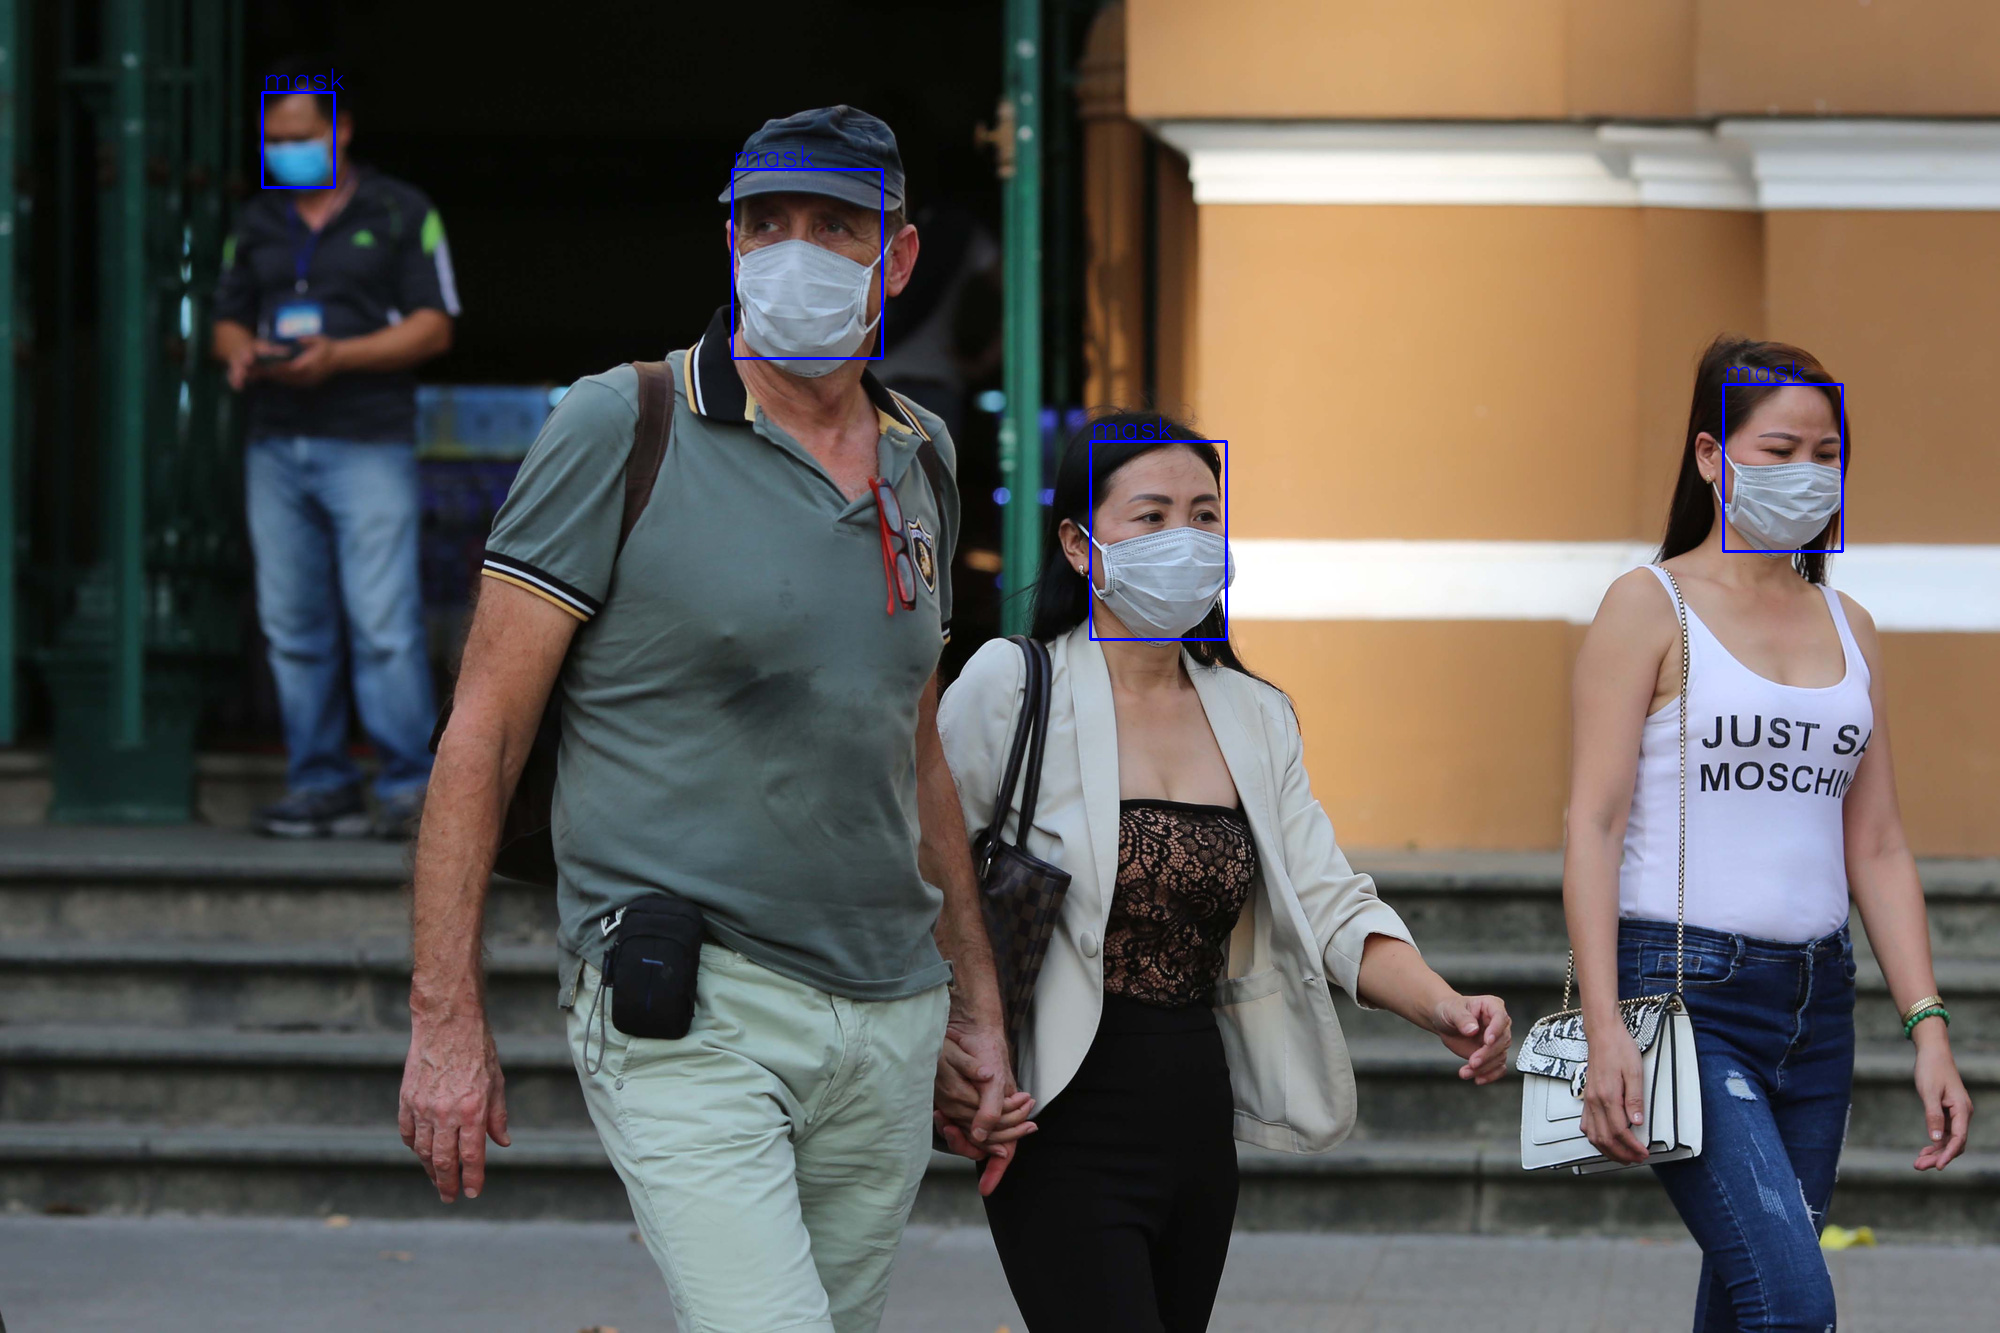

In [39]:
#chạy dự đoán

print("nhập đường dẫn ảnh")
path_to_image =input()
if not (path_to_image.startswith('https://')):
  image = cv2.imread(path_to_image)
else:
  image=download(path_to_image,"test.png")

detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3) # khởi tạo "model"
detections = detector.detect(image) # nhận diện gương mặt trong ảnh
#color in BGR 
color1 = (255, 0, 0)   
color2 = (0, 0, 255)   
# Line thickness of 2 px 
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX

# Draw detect box on image
for face in range(len(detections)):
  pts1 = (detections[face][0],detections[face][1])
  pts2 = (detections[face][2],detections[face][3])
  img_crop = image[(int)(detections[face][1]):(int)(detections[face][3]), (int)(detections[face][0]):(int)(detections[face][2]), :]
  
  img = cv2.resize(src=img_crop, dsize=(96, 128))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hog = cv2.HOGDescriptor()
  feature_hog = hog.compute(img).flatten()
  pre=clf_svm.predict([feature_hog])
  if(pre[0]=="mask"):
    color=color1
  else:
    color=color2
  image = cv2.rectangle(image, pts1, pts2, color, thickness)
  cv2.putText(image,pre[0],((int)(detections[face][0]),(int)(detections[face][1])-3), font, 1,color,1,cv2.LINE_AA)
cv2_imshow(image)
